In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import optimize
from scipy import signal
from scipy import fftpack
from scipy import ndimage

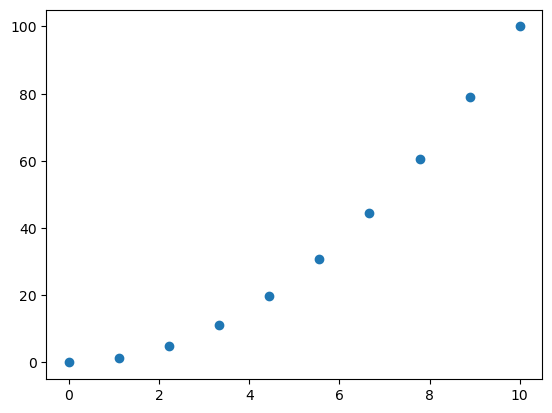

In [2]:
x= np.linspace(0, 10, 10)
y = x**2

plt.scatter(x, y)

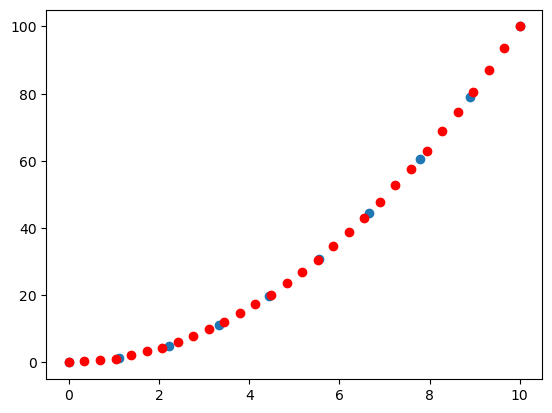

In [3]:
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 30)

result = f(new_x)

plt.scatter(x, y)

plt.scatter(new_x, result,c='red')

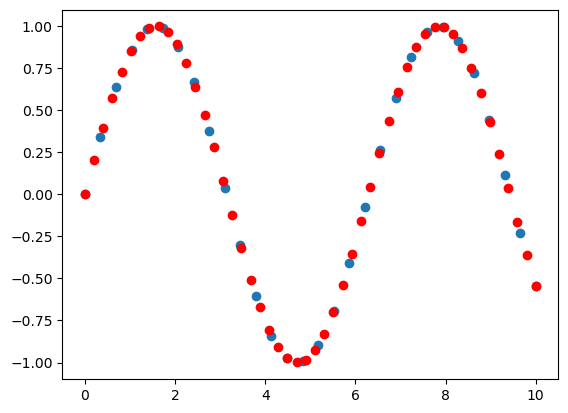

In [4]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

f = interp1d(x, y, kind='cubic')

new_x = np.linspace(0, 10, 50)

result2 = f(new_x)

plt.scatter(x, y)

plt.scatter(new_x, result2,c='red')


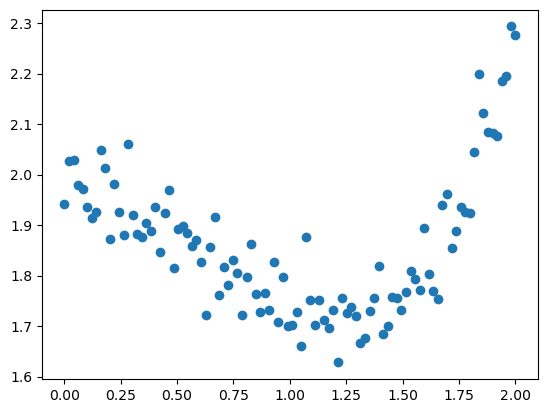

In [5]:
x = np.linspace(0,2,100)
y = 1/3 * x**3 -3/5* x**2 + 2 + np.random.randn(x.shape[0])/20

plt.scatter(x,y)

In [6]:
def f(x,a,b,c,d):
    return a + x**3 + b * x**2 + c * x + d

In [7]:
param,param_cov =optimize.curve_fit(f, x, y)

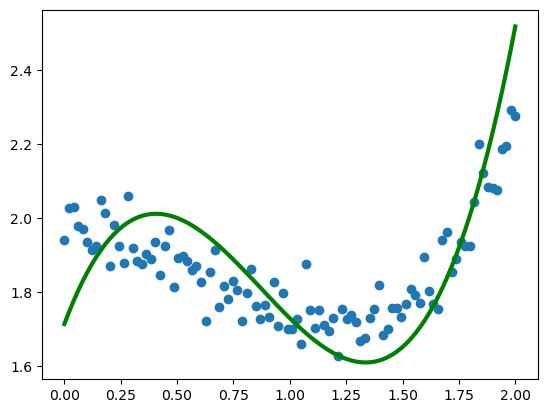

In [8]:
plt.scatter(x,y)
plt.plot(x, f(x, param[0], param[1], param[2], param[3]), color='g',lw=3)

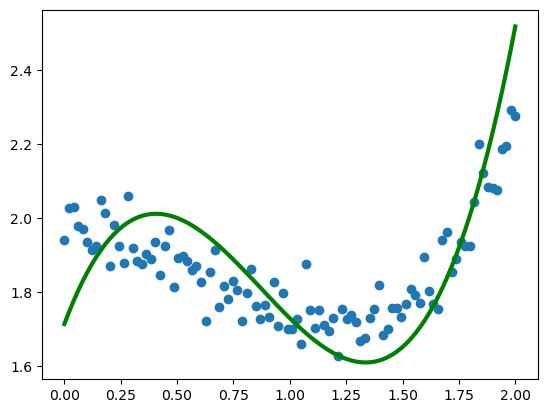

In [9]:
plt.scatter(x,y)
plt.plot(x, f(x, *param), color='g',lw=3)

In [10]:
def f(x):
    return x**2 + 15*np.sin(x)

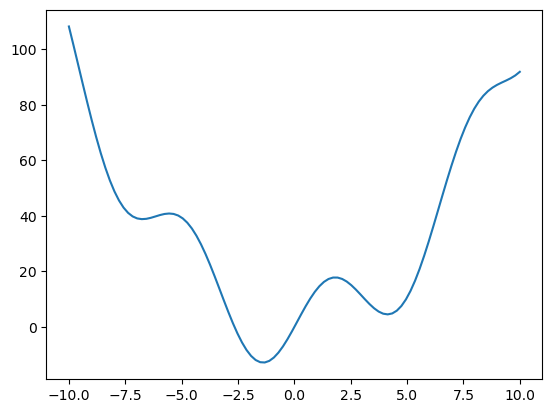

In [11]:
x = np.linspace(-10,10,100)
plt.plot(x,f(x))

In [12]:
x0 = -5
result =optimize.minimize(f, x0=x0).x

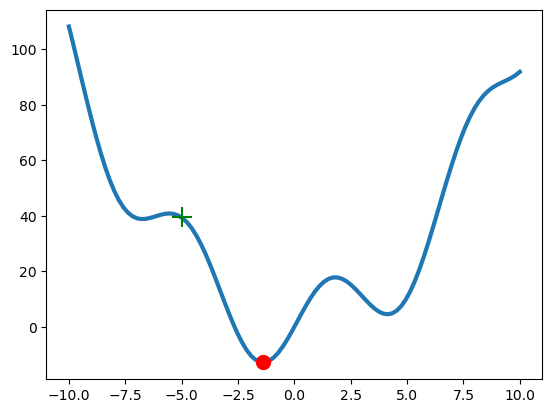

In [13]:
plt.plot(x,f(x),lw=3, zorder = 1)
plt.scatter(result, f(result), s= 100, c = 'r', zorder = 1)
plt.scatter(x0,f(x0), s= 200, marker = "+", c="g", zorder = 1)
plt.show()

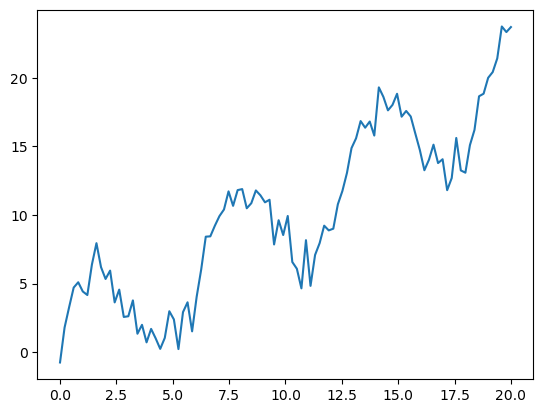

In [14]:
x = np.linspace(0,20,100)
y = x+4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

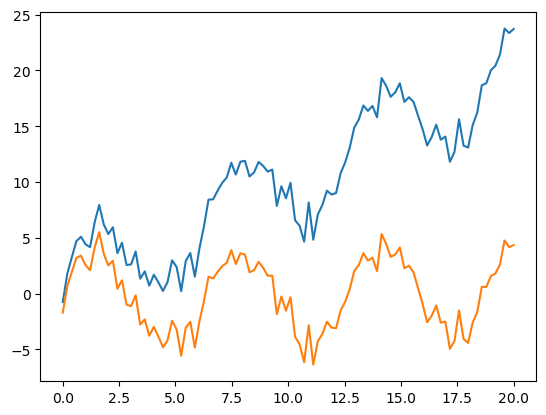

In [15]:
new_y = signal.detrend(y)

plt.plot(x,y)
plt.plot(x,new_y)

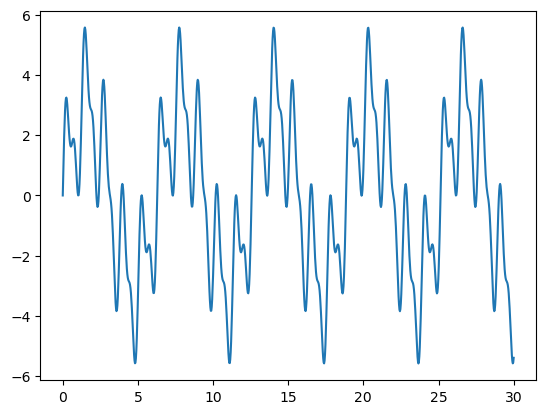

In [16]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)

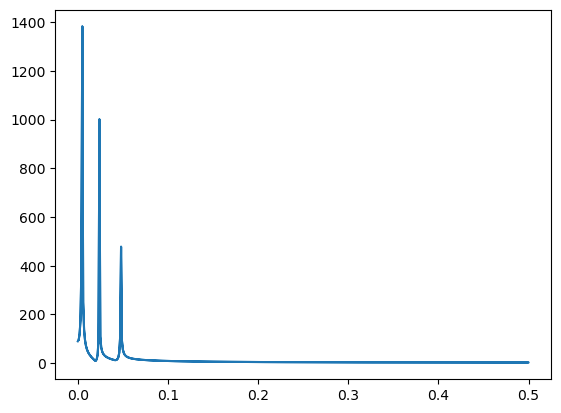

In [17]:
fourier  = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power)

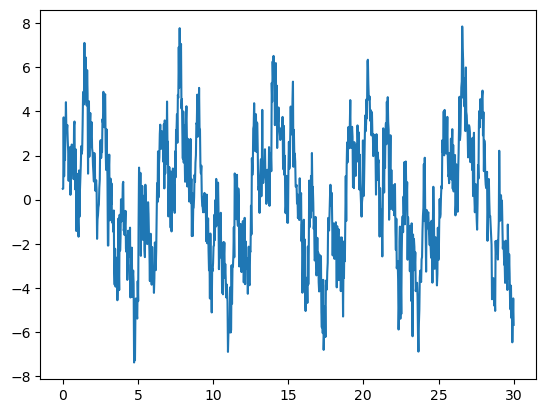

In [18]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.randn(x.shape[0])  
plt.plot(x,y)      

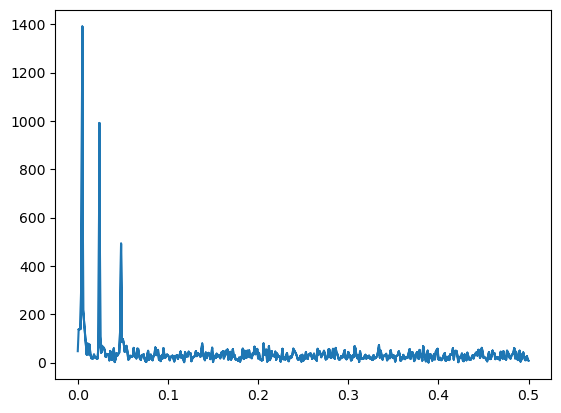

In [19]:
fourier  = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power)

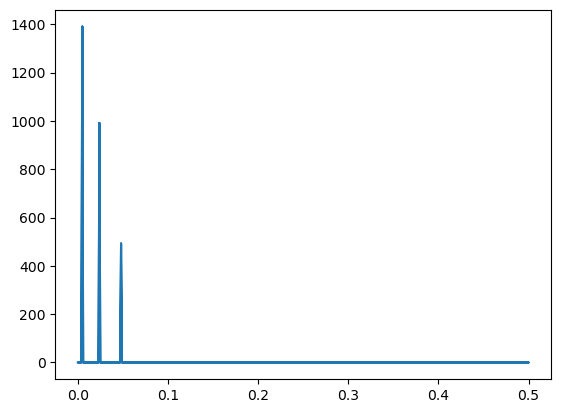

In [20]:
fourier[power<400] = 0
plt.plot(np.abs(frequences),np.abs(fourier))

In [21]:
filtered_signal = fftpack.ifft(fourier)

/home/gloire/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gloire/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


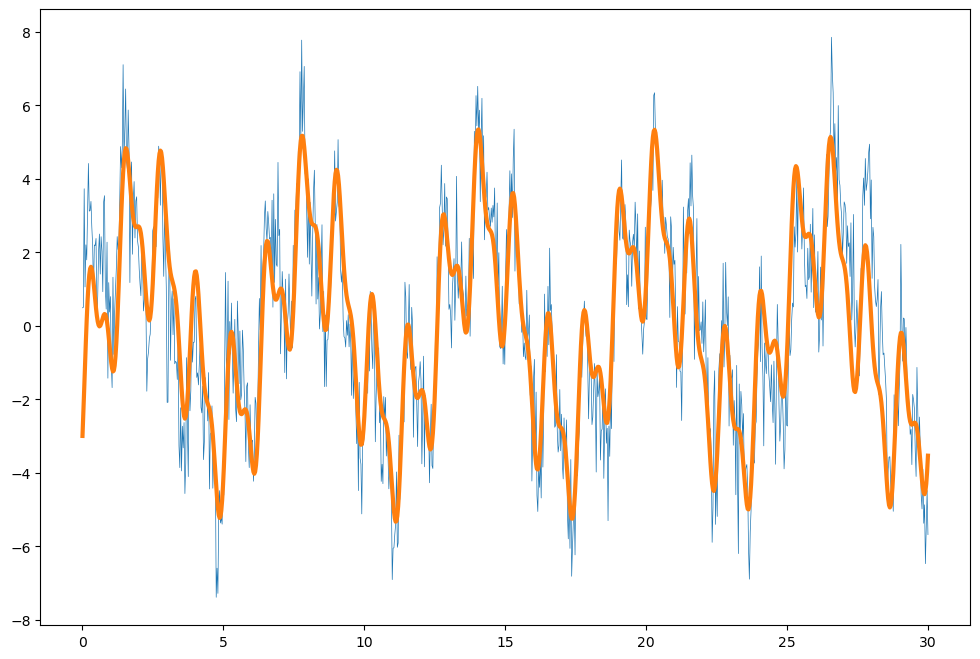

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(x,y, lw=0.5)
plt.plot(x,filtered_signal, lw=3)
plt.show()

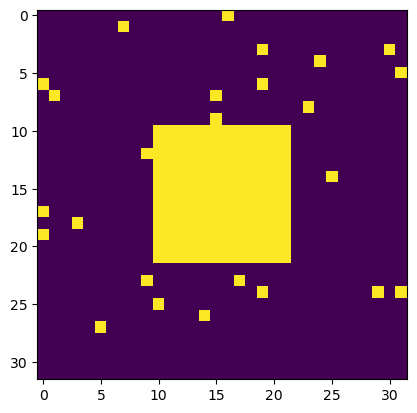

In [23]:
np.random.seed(0)
x = np.zeros((32,32))
x [10:-10, 10:-10] = 1
x [np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1
plt.imshow(x)

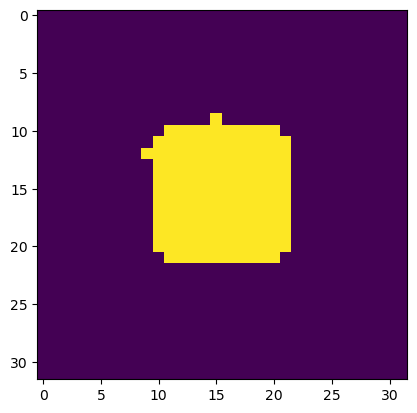

In [24]:
open_x =ndimage.binary_opening(x)
plt.imshow(open_x)

(507, 537)

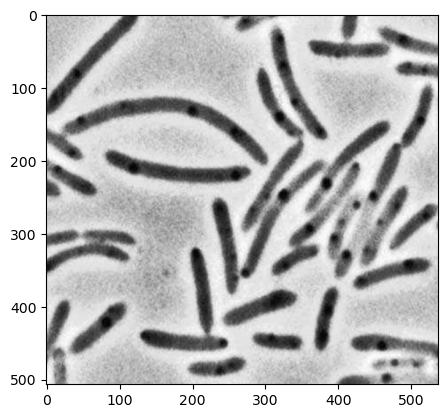

In [25]:
image = plt.imread("bacteria.png")
image = image[:,:,0]
plt.imshow(image,cmap = "gray")
image.shape

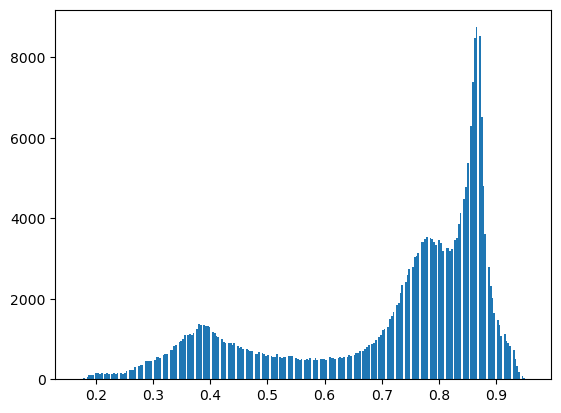

In [26]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


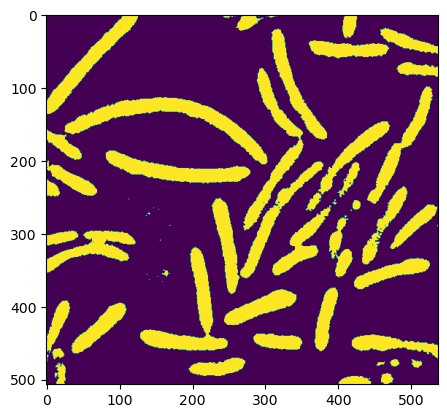

In [27]:
image = image < 0.6

print(image)

plt.imshow(image)

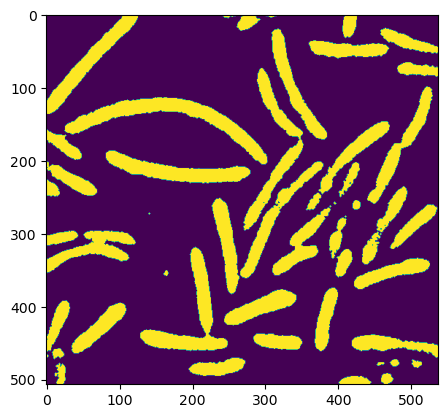

In [28]:
open_x =ndimage.binary_opening(image)
plt.imshow(open_x)

53


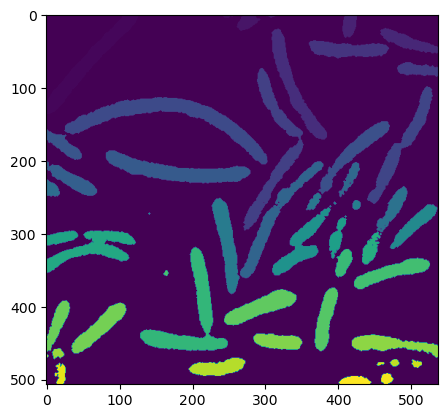

In [29]:
label_image,n_labels = ndimage.label(open_x)


print(n_labels)


plt.imshow(label_image)

[0.000e+00 3.321e+03 7.500e+01 4.620e+02 5.800e+01 5.220e+02 1.167e+03
 2.706e+03 1.837e+03 7.720e+02 3.722e+03 2.746e+03 5.733e+03 2.060e+03
 8.600e+02 3.820e+03 1.222e+03 2.733e+03 4.810e+02 3.170e+02 9.790e+02
 2.510e+02 2.317e+03 1.180e+02 1.000e+01 1.218e+03 5.000e+00 2.176e+03
 5.000e+00 5.000e+00 6.070e+02 5.860e+02 2.692e+03 6.140e+02 5.000e+00
 4.295e+03 5.880e+02 1.849e+03 3.600e+01 1.498e+03 2.183e+03 1.006e+03
 1.825e+03 1.147e+03 1.826e+03 1.690e+02 1.200e+01 1.276e+03 9.400e+01
 1.070e+02 3.700e+01 3.010e+02 1.900e+02]


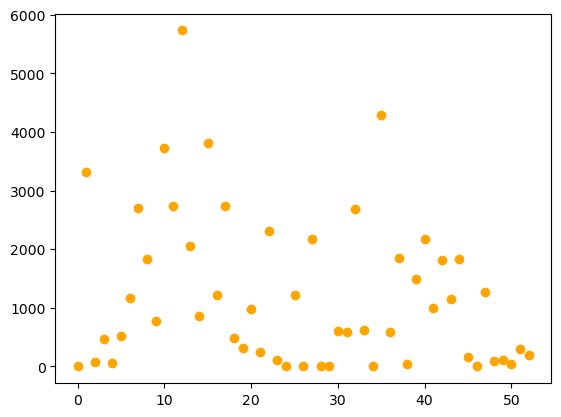

In [30]:
sizes = ndimage.sum(open_x,label_image,range(n_labels))
print(sizes)

plt.scatter(range(n_labels), sizes, c="orange")